# Main Experiments
    refer mainRTain_test.py
    July 21 2025

In [1]:
import os
import numpy as np
import pandas as pd

from datetime import datetime

from datetime import datetime

from Core.models import CModels
from Core.dataset import CDataset
from Core.plots import CPlots

from mainRTrain_test import Run_RTrain, Run_RV
from Core.tSNE import tSNEPlots, Beth, Kyoto

# train_test_split setting
bShuffle = False
aStratify = None 
aRS = None

# Configure Dataset

## <font color='red'> KYOTO </font>

### Configure

In [2]:
cDATA = 'Kyoto'

objDS = CDataset()

strFileName =  r'../DATA/Kyoto2015DS.csv'
#strPath = os.path.join(strRoot, strFileName)
listData, listLabel = objDS.GetKyotoDataset(strFileName)
print('Kyoto:', listData.shape, listLabel.shape)

fTestSize = 0.9
nRepeats = 10
nSteps = 5
listSelectedClassifier = [3, 4, 5]

CDataset Object Created
label
0    30000
1    30000
dtype: int64
Kyoto: (60000, 13) (60000, 1)


### Add synthetic data

In [ ]:
strSynFileName = '../DATA/Kyoto_Syn_3000.csv'
dfSyn = pd.read_csv(strSynFileName, delimiter=',')
dfSyn['Label'] = 1
print(dfSyn.shape)

listSynLabel = dfSyn['Label'].to_numpy().reshape(-1,1)
print(listSynLabel.shape)

listSynData = dfSyn.drop('Label', axis=1)
print(listSynData.shape)

listData = np.vstack([listData, listSynData])
listLabel = np.vstack([listLabel, listSynLabel])
print('Kyoto:', listData.shape, listLabel.shape)

bShuffle = True
aStratify = 'y' 
aRS = None

### Add adversarial data

In [3]:
strAdvFileName = '../DATA/Kyoto_Adv_3000.csv'
listAdv = np.loadtxt(strAdvFileName, delimiter=',')
print(listAdv.shape, listAdv[:,0:13].shape)

listData = np.vstack((listData, listAdv[:,0:13]))
listLabel = np.vstack((listLabel, listAdv[:,13].reshape(-1,1)))
print('Kyoto:', listData.shape, listLabel.shape)

bShuffle = True
aStratify = 'y' 
aRS = None

(3000, 14) (3000, 13)
Kyoto: (63000, 13) (63000, 1)


### TSNE

In [ ]:
objDS = CDataset()
strFileName = r'../DATA/Kyoto2015DS.csv'
df = Kyoto(objDS, strFileName, True)

strOutputFile = './local-data/tsneKyoto_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

#### All 60k Samples

In [ ]:
listDS = np.hstack((listData, listLabel))
print(listDS.shape)

# Here add header to the dataset and also add labels 
dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=None)


## <font color='red'> BETH </font>

In [ ]:
objDS = CDataset()

strFileName = r'../DATA/Beth_16Aug2023.csv'
df = Beth(objDS, strFileName, nExp=1)
df = df.sample(frac=0.1)
print('Sampled: ', df['Labels'].value_counts())

strOutputFile = './local-data/tsneBeth_train.pdf'
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

## <font color='red'> MNIST </font>

In [ ]:
cDATA = 'Digit'

objDS = CDataset()
listData, listLabel = objDS.PrepareMNISTDS()
print(listData.shape, listLabel.reshape(-1, 1).shape)

strOutputFile = './local-data/tsneDigit_train.pdf'

listDS = np.hstack((listData, listLabel.reshape(-1, 1)))
print(listDS.shape)

dfCols = ['Bin_'+str(i) for i in range(listData.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)
tSNEPlots(df, listLabels=['Positive', 'Negative'], 
          strOutputFile=strOutputFile)

# <font color='blue'>NEW RUN TEST</font>

## Set Output Path

In [4]:

# Generate output directory
strOutDir = datetime.now().strftime('%Y_%m_%d')
print(strOutDir)
strDirPath = os.path.join(os.getcwd(), 'local-data', cDATA + '_' + strOutDir)
if not os.path.isdir(strDirPath):
    os.makedirs(strDirPath)


2025_08_18


## Run_RTrain

Combination - D:  3 A:  3
CModels Object Created
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.  ]
0.05
trainSize =  0.05  repeats =  10
np.mean(tpr_aucDs) 0.966
np.mean(afr_aucDs) 0.683
0.1
trainSize =  0.1  repeats =  10
np.mean(tpr_aucDs) 0.973
np.mean(afr_aucDs) 0.607
0.15
trainSize =  0.15  repeats =  10
np.mean(tpr_aucDs) 0.975
np.mean(afr_aucDs) 0.635
0.2
trainSize =  0.2  repeats =  10
np.mean(tpr_aucDs) 0.976
np.mean(afr_aucDs) 0.587
0.25
trainSize =  0.25  repeats =  10
np.mean(tpr_aucDs) 0.977
np.mean(afr_aucDs) 0.557
0.3
trainSize =  0.3  repeats =  10
np.mean(tpr_aucDs) 0.979
np.mean(afr_aucDs) 0.615
0.35
trainSize =  0.35  repeats =  10
np.mean(tpr_aucDs) 0.977
np.mean(afr_aucDs) 0.56
0.4
trainSize =  0.4  repeats =  10
np.mean(tpr_aucDs) 0.978
np.mean(afr_aucDs) 0.592
0.45
trainSize =  0.45  repeats =  10
np.mean(tpr_aucDs) 0.978
np.mean(afr_aucDs) 0.655
0.5
trainSize =  0.5  repeats =  10
np.mean(tpr_aucDs) 0.977
np.me

<Figure size 640x480 with 0 Axes>

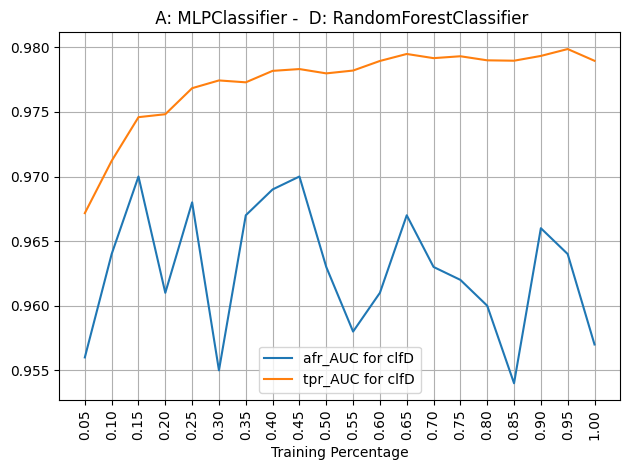

<Figure size 640x480 with 0 Axes>

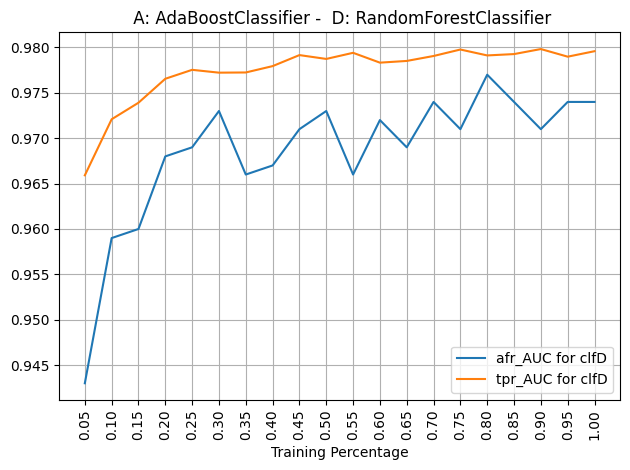

<Figure size 640x480 with 0 Axes>

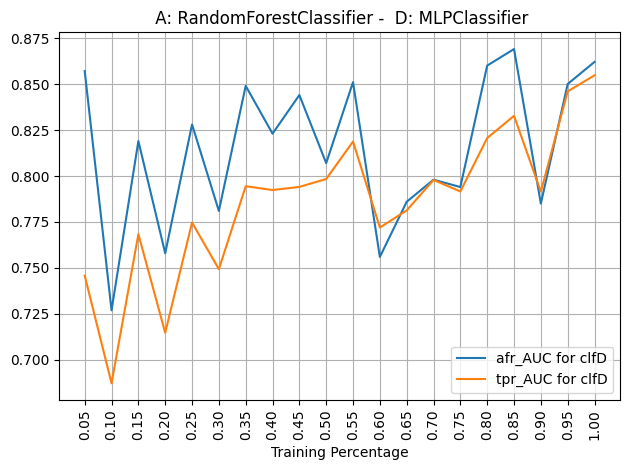

<Figure size 640x480 with 0 Axes>

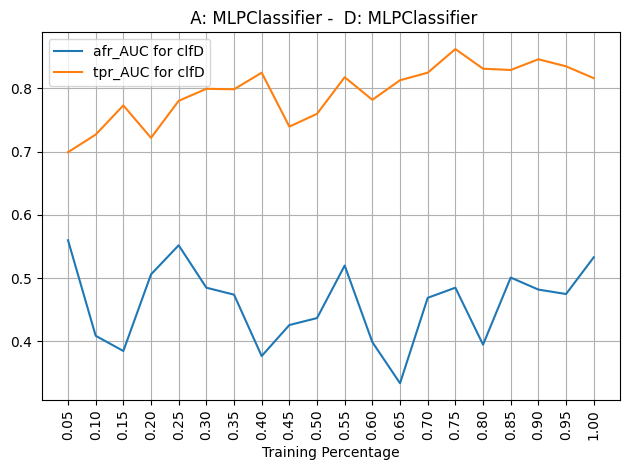

<Figure size 640x480 with 0 Axes>

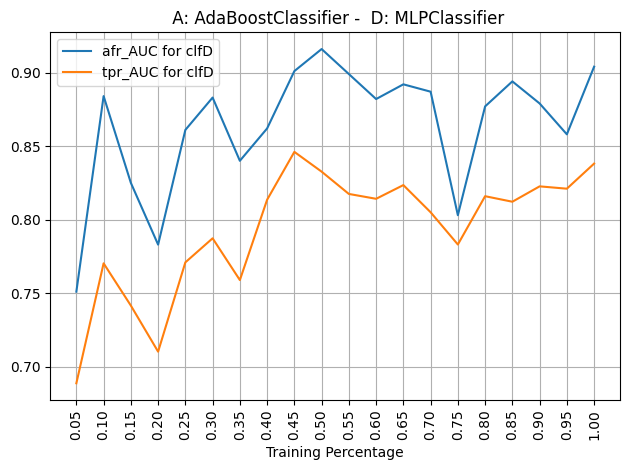

<Figure size 640x480 with 0 Axes>

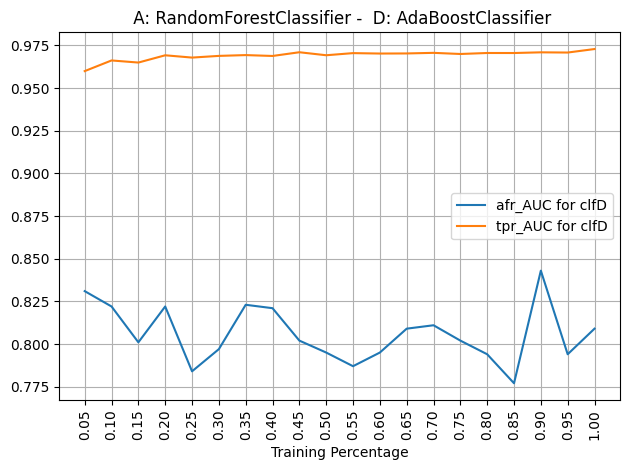

<Figure size 640x480 with 0 Axes>

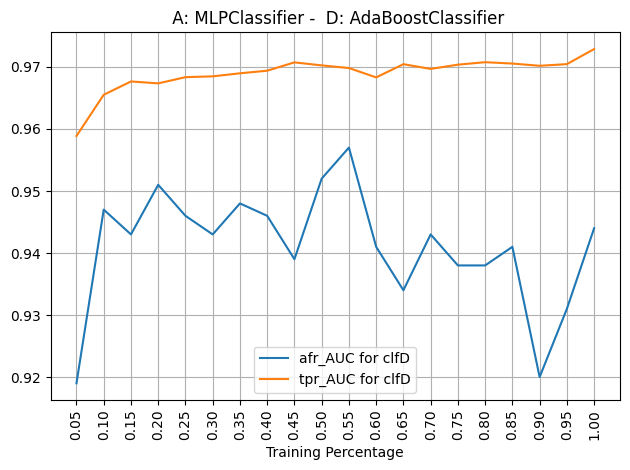

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

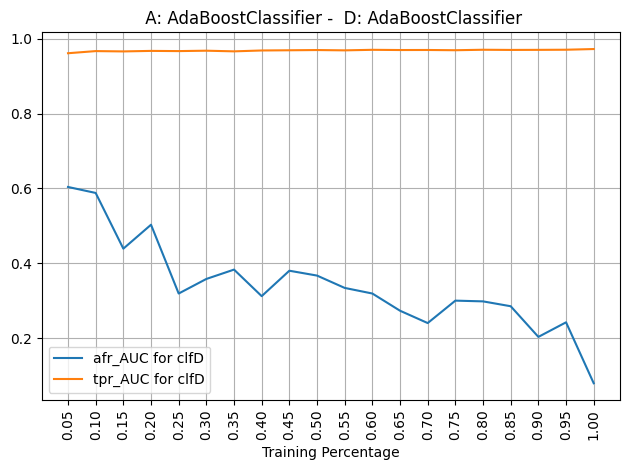

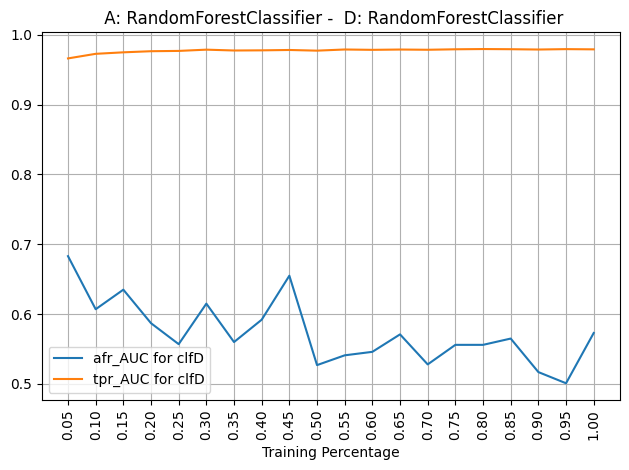

<Figure size 640x480 with 0 Axes>

In [5]:
Run_RTrain(strDirPath, fTestSize, listSelectedClassifier,
           listData, listLabel, nRepeats, nSteps,
           bShuffle, aStratify, aRS)

## <font color='green'>Run_RV</font>

## Load previous results
    Set Local Path - If not a new run

In [ ]:
strDirPath = r'./local-data/Kyoto_2025_07_22'
strDirPath = r'./local-data/Kyoto_2025_08_17'

## If fresh run donot set the above path

In [7]:
Run_RV(strDirPath, fTestSize, listSelectedClassifier,
        listData, listLabel, nRepeats, nSteps,
        bShuffle, aStratify, aRS)

CModels Object Created
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]
rw100 =  0  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.979
np.mean(afr_aucRs) 0.019
rw100 =  5  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.978
np.mean(afr_aucRs) 0.374
rw100 =  10  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.976
np.mean(afr_aucRs) 0.44
rw100 =  15  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.974
np.mean(afr_aucRs) 0.489
rw100 =  20  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.974
np.mean(afr_aucRs) 0.523
rw100 =  25  repeats =  10
np.mean(tpr_aucAs) 0.981
np.mean(tpr_aucRs) 0.973
np.mean(afr_aucRs) 0.545
rw100 =  30  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.971
np.mean(afr_aucRs) 0.549
rw100 =  35  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.967
np.mean(afr_aucRs) 0.566
rw100 =  40  repeats =  10
np.mean(tpr_aucAs) 0.979
np.mean(tpr_aucRs) 0.964


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# <font color='blue'>Use nbPlotResults to generate final plots</font>